In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [4]:
mnist = load_digits()
print(mnist.data.shape)
X = mnist.data 
y = mnist.target

(1797, 64)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(1347, 64) (1347,)
(450, 64) (450,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([127, 140, 136, 143, 129, 134, 133, 138, 129, 138], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([51, 42, 41, 40, 52, 48, 48, 41, 45, 42], dtype=int64))


In [6]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [7]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9755555555555555


In [11]:
# Average across all classes

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

# Model F1-score
print("F-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Precision: 0.9752845191480375
Recall: 0.9760912698412698
F-score: 0.974914270650919


In [12]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

# Metrics for each class
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [1.         0.89361702 1.         0.97560976 1.         1.
 1.         0.97619048 0.97560976 0.93181818]

Recall 
 [1.         1.         1.         1.         1.         0.91666667
 0.97916667 1.         0.88888889 0.97619048]

F-score 
 [1.         0.94382022 1.         0.98765432 1.         0.95652174
 0.98947368 0.98795181 0.93023256 0.95348837]


In [13]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  1,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]], dtype=int64)

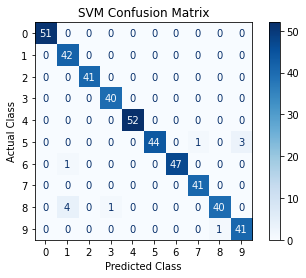

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()  